In [1]:
import numpy as np
import pandas as pd
import humap
import time

import matplotlib.pyplot as plt
import math
import os

from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_array

In [2]:
def load_fmnist():
    fashionTrain = pd.read_csv('./../data/fashion-train.csv')

    fashionX = fashionTrain.values[:,2:]
    fashionY = fashionTrain.values[:, 1].astype(int)

    X = normalize(fashionX)
    y = fashionY
#     X = PCA(n_components=15).fit_transform(X)
    X = check_array(X, dtype=np.float32, accept_sparse='csr', order='C')
    
    return X, y

def load_mnist():
    X = np.load('./../data/MNIST_70000.npy')
    y = np.load('./../data/MNIST_70000_label.npy').astype(int)
    X = normalize(X)
    X = check_array(X, dtype=np.float32, accept_sparse='csr', order='C')
    
    return X, y

X, y = load_mnist()
print(X.shape, y.shape)

(70000, 784) (70000,)


In [10]:
hUmap = humap.HUMAP(np.array([0.2, 0.2]))
# hUmap.set_focus_context(True)
hUmap.fit(X, y)

In [11]:
X_2 = X[hUmap.original_indices(2), :]
X_1 = X[hUmap.original_indices(1), :]


# Using 'transform' method to project a hierarchy level

In [12]:
"""
    Projecting the top-level (2)
"""
embedding_2 = hUmap.transform(2)
y_2 = hUmap.labels(2)

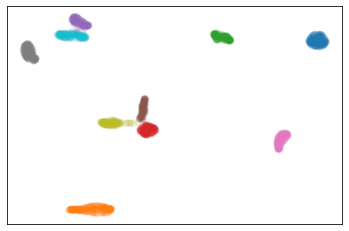

In [13]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

In [14]:

hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding_2)

embedding_1 = hUmap.transform(1)
y_1 = hUmap.labels(1)
embedding_1.shape

(14000, 2)

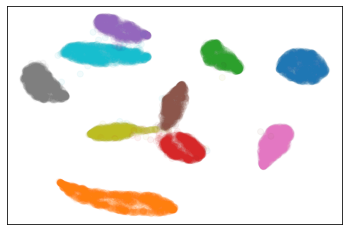

In [15]:
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], c=y_1, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

In [16]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding_1)

embedding_0 = hUmap.transform(0)
y_0 = y
embedding_0.shape

(70000, 2)

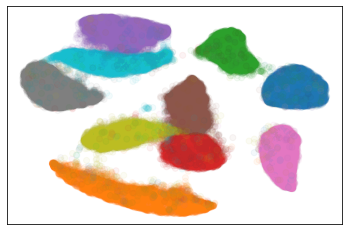

In [17]:
plt.scatter(embedding_0[:, 0], embedding_0[:, 1], c=y_0.astype(int), alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

# Using 'transform' method to project a subset of indices

I will use a clustering to discover indices more easily

In [39]:
from sklearn.cluster import KMeans, DBSCAN

# kmeans = KMeans(n_clusters=4, random_state=11).fit(embedding_2)
kmeans = DBSCAN().fit(embedding_2)
kmeans.labels_


array([0, 0, 0, ..., 3, 0, 1])

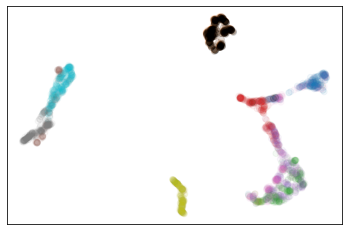

In [41]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

# indices_black = np.arange(embedding_2.shape[0])[kmeans.labels_ == 1]

indices_black = np.arange(y_2.shape[0])[y_2 == 1]
# for i in np.arange(y_2.shape[0]):
    

plt.scatter(embedding_2[indices_black, 0], embedding_2[indices_black, 1], c='black', alpha=0.1)

In [42]:
hUmap.set_fixing_term(0.01)

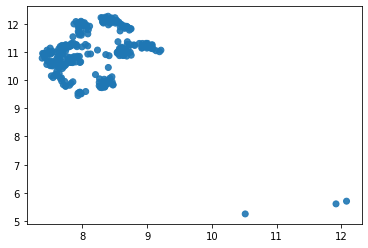

In [43]:
points_before = embedding_2[indices_black]
plt.scatter(points_before[:, 0], points_before[:, 1], c=y_2[indices_black], alpha=0.9, cmap='tab10')

In [ ]:
"""
    Use transform method, however, make sure to specify indices=
"""
points = embedding_2[indices_black]
hUmap.fix_datapoints(points)

embedding_cluster1, y_cluster1, indices_cluster1 = hUmap.transform(2, indices=indices_black)
# X_cluster1 = X_1[indices_cluster1]



In [33]:
embedding_cluster1.shape, y_cluster1.shape, indices_cluster1.shape

((5978, 2), (5978,), (5978,))

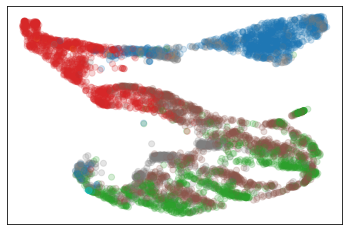

In [34]:
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1], c=y_cluster1, alpha=0.2, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

In [35]:
# aligned = hUmap.geom_trans(points_before, embedding_cluster1)
# points_before.shape, embedding_cluster1.shape, aligned.shape

# plt.scatter(aligned[:, 0], aligned[:, 1],  c=y_cluster1, alpha=0.2, cmap='tab10')

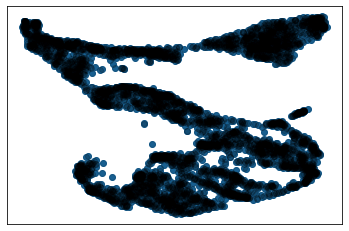

In [36]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(embedding_cluster1)
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1])#, c=y_cluster1, alpha=0.1, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

indices_black = np.arange(embedding_cluster1.shape[0])[kmeans.labels_ == 0]

plt.scatter(embedding_cluster1[indices_black, 0], embedding_cluster1[indices_black, 1], c='black', alpha=0.2)

In [37]:
"""
    Do the same as in the previous example
    
    Here (and for possibly subsequent levels), we have to indices = indices_clusterLevel[indices_black]
    
"""
points = embedding_cluster1[indices_black]
hUmap.fix_datapoints(points)

embedding_cluster2, y_cluster2, indices_cluster2 = hUmap.transform(1, indices=indices_cluster1[indices_black])
X_cluster2 = X[indices_cluster2]



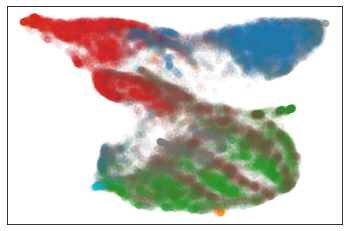

In [38]:
plt.scatter(embedding_cluster2[:, 0], embedding_cluster2[:, 1], c=y_cluster2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

In [193]:
# aligned = hUmap.geom_trans(embedding_cluster1, embedding_cluster2)
# embedding_cluster1.shape, embedding_cluster2.shape, aligned.shape

# plt.scatter(aligned[:, 0], aligned[:, 1],  c=y_cluster2, alpha=0.2, cmap='tab10')

# Using 'transform' method for projecting based on class

In [55]:
"""
    Make sure to set indices=, and class_based=True
"""

embedding_cluster, y_cluster, indices_cluster = hUmap.transform(2, indices=np.array([4, 9]), class_based=True)
X_cluster = X_1[indices_cluster]

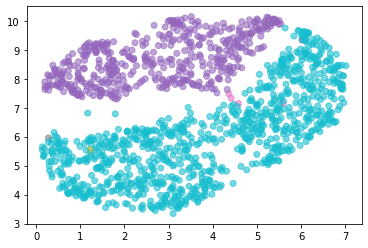

In [56]:
plt.scatter(embedding_cluster[:, 0], embedding_cluster[:, 1], c=y_cluster, alpha=0.6, cmap='tab10')
plt.show()


In [75]:
embedding_cluster0, y_cluster0, indices_cluster0 = hUmap.transform(1, indices=np.array([4, 9]), class_based=True)
X_cluster0 = X[indices_cluster0]
yy = y[indices_cluster0]

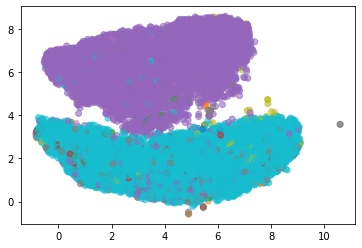

In [76]:
plt.scatter(embedding_cluster0[:, 0], embedding_cluster0[:, 1], c=yy, alpha=0.6, cmap='tab10')
plt.show()